In [1]:
import os
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App/Notebooks')
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from Notebooks.functions_EDA import destination_migrants, destination_migrants_top5, total_migration
from create_regions import create_regions
import folium
import geopandas as gpd
from shapely.geometry import LineString, MultiPolygon

# Exploratory Data Analysis

## EDA on dataset1

In [2]:
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App')
df1 = pd.read_csv('DATA/dataset1.csv')
columns = ['North America', 'Central America', 'South America', 'North Africa', 'Sub-Saharan Africa', 'Northern Europe', 'Western Europe', 
               'Southern Europe', 'Eastern Europe', 'Central Asia', 'Western Asia', 'South Asia', 'East Asia', 'South-East Asia', 'Oceania']
df1.index = columns
df1 = df1[columns] 

In [3]:
df1.head()

,North America,Central America,South America,North Africa,Sub-Saharan Africa,Northern Europe,Western Europe,Southern Europe,Eastern Europe,Central Asia,Western Asia,South Asia,East Asia,South-East Asia,Oceania
North America,96102,208668,68240,4253,58827,248379,279267,551959,162959,85259,131288,158,39145,41758,52303
Central America,3233173,215008,36975,390,2414,42572,81356,190931,4962,3145,6236,14,1754,510,7541
South America,394674,26456,600759,417,19431,68645,157063,1200694,18644,5090,32516,351,110426,2035,28490
North Africa,62193,93,692,57855,12512,22807,404765,442162,5437,1382,367718,1,312,340,6858
Sub-Saharan Africa,478694,793,10738,44230,3717881,483736,430954,312329,6442,2724,305291,243,2918,576,149130


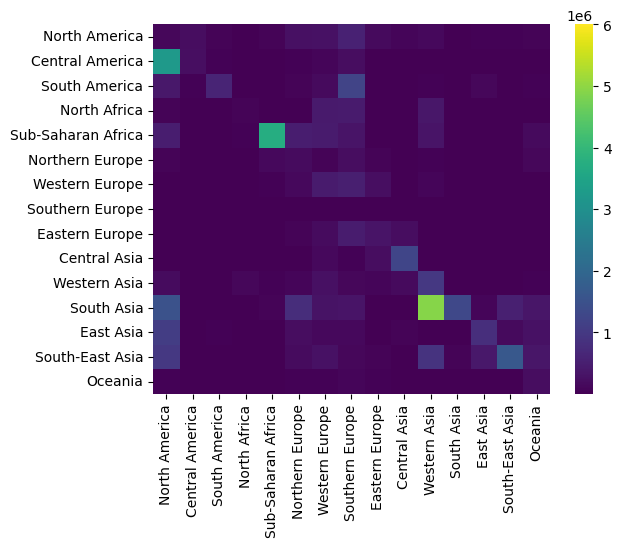

In [14]:
sns.heatmap(df1, cmap="viridis", vmin=1, vmax=6e6, robust = True)
plt.show()

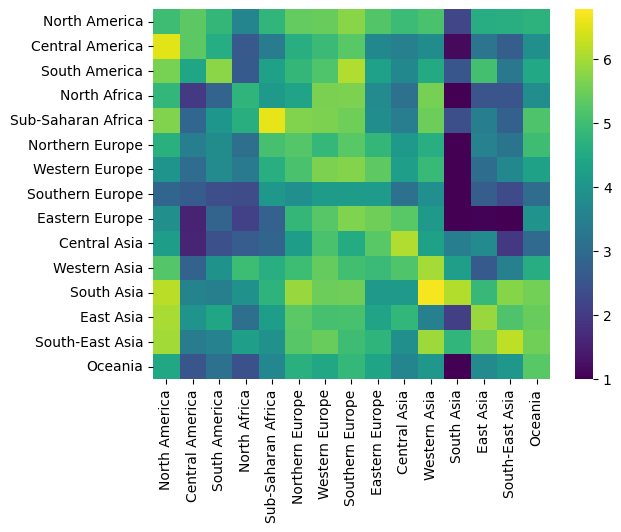

In [18]:
# Logarithmic scale 
log_data = np.log10(df1)
sns.heatmap(log_data, cmap="viridis", vmin=np.log10(10), vmax=np.log10(6e6))
plt.show()

In [3]:
total_migration(df1)

Destination of migrants 
 
 North America         8082719
Central America        471872
South America          772875
North Africa           232240
Sub-Saharan Africa    4110572
Northern Europe       2525043
Western Europe        3161677
Southern Europe       4632504
Eastern Europe        1203577
Central Asia          1796468
Western Asia          7770135
South Asia            1386896
East Asia             1406739
South-East Asia       2369215
Oceania               1563068
dtype: int64 
 
 
There is 41485600 migrations in total


### Destination of migrants

#### With a pie

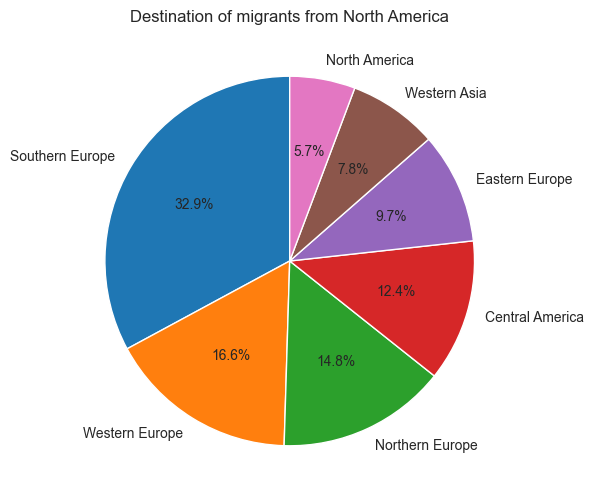

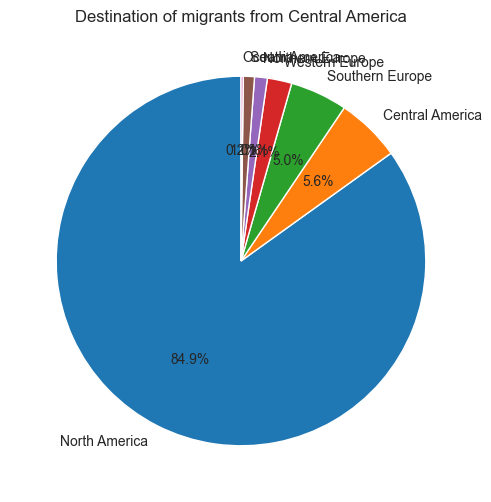

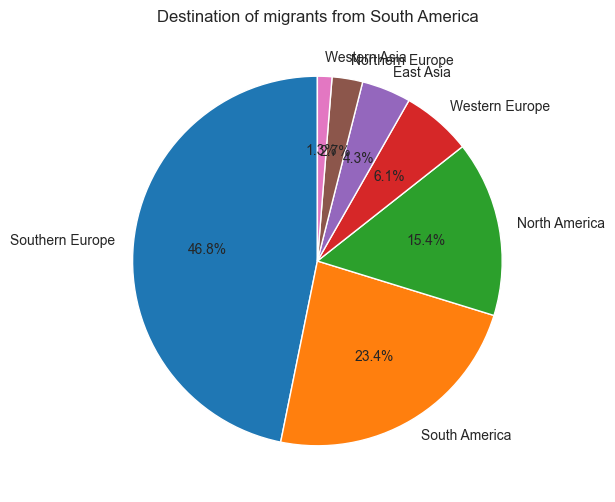

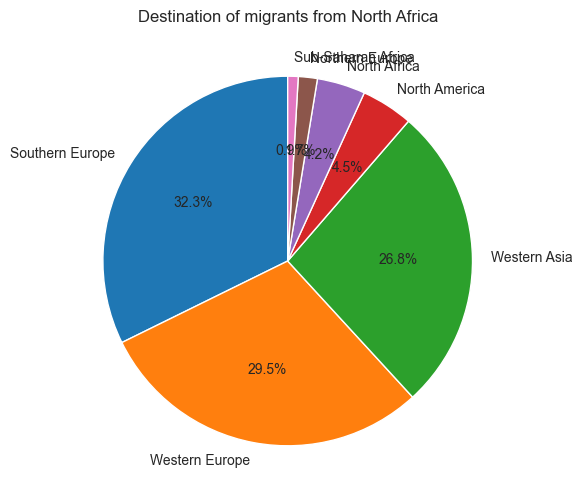

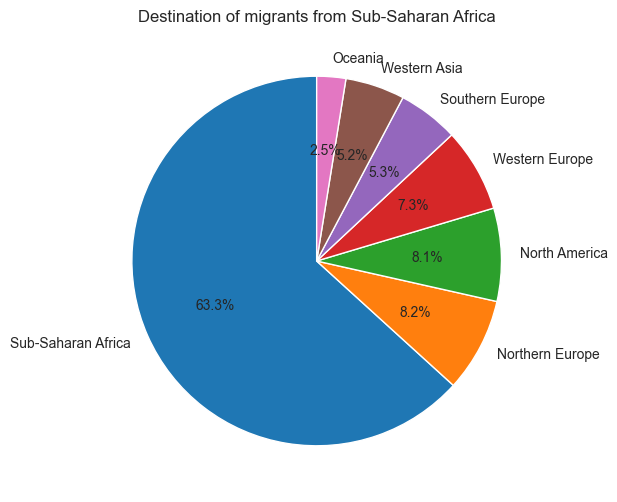

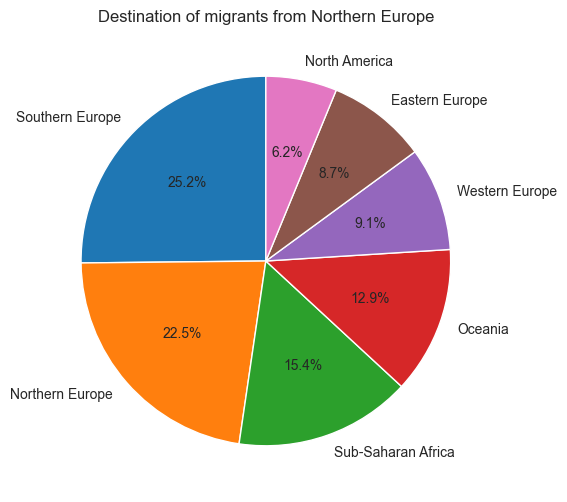

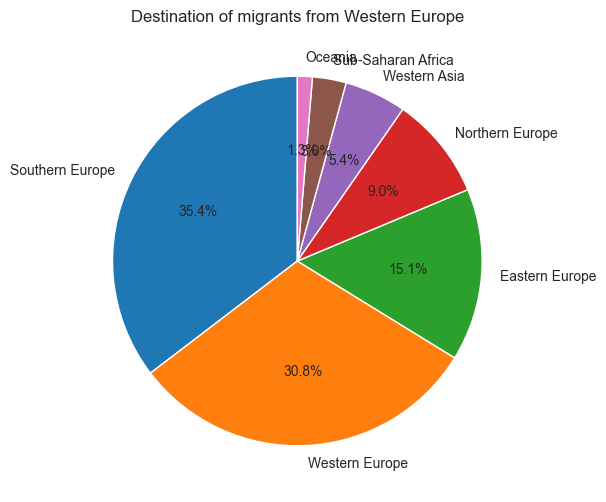

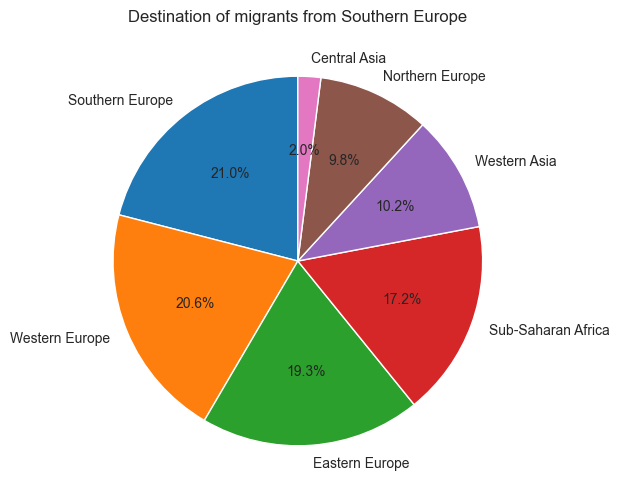

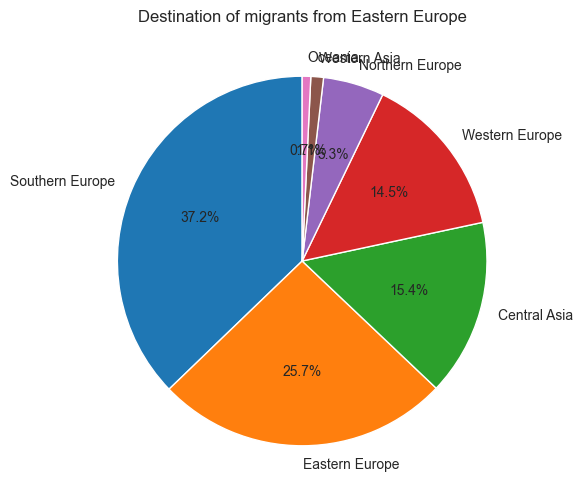

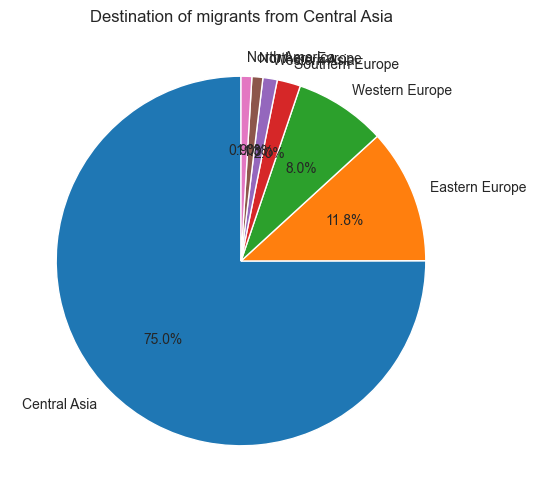

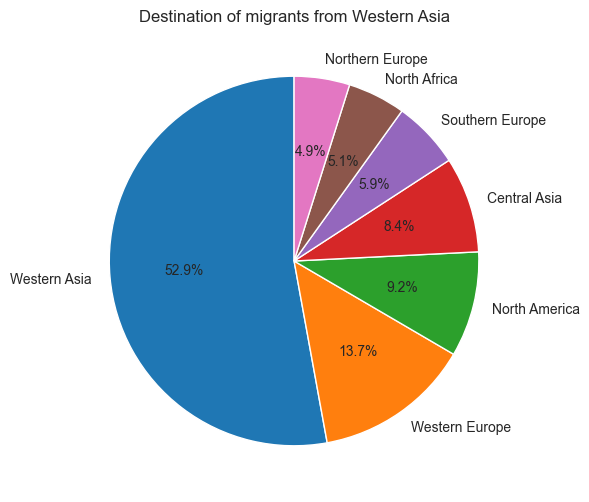

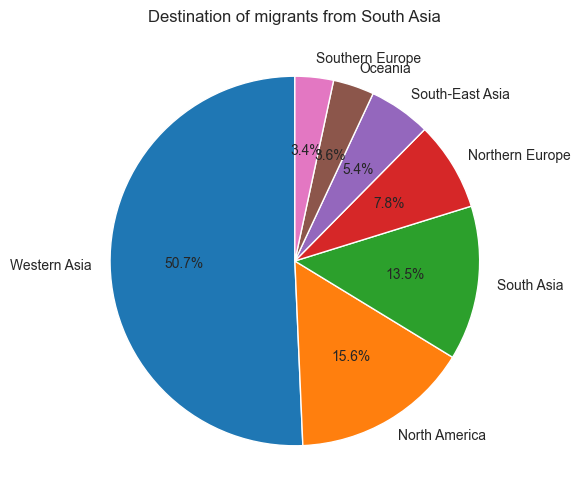

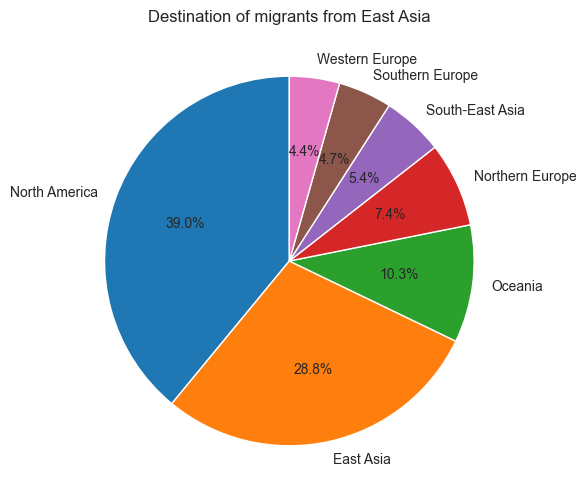

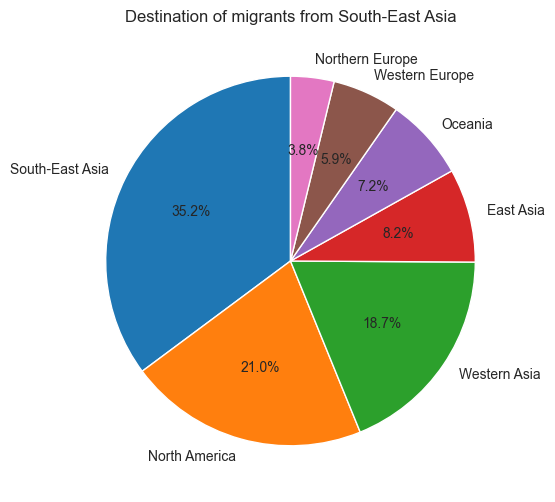

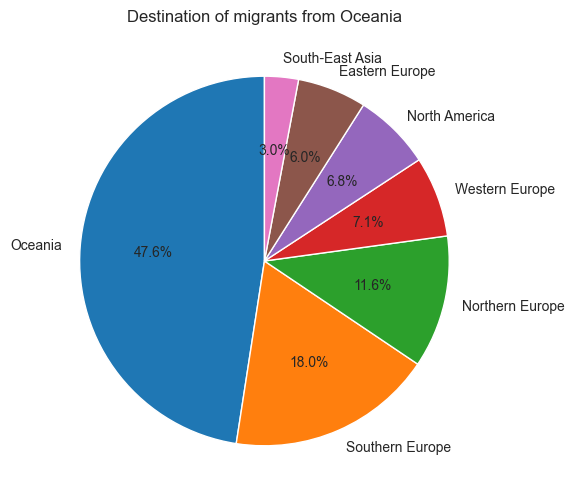

In [8]:
for region in list(df1.columns):    
    destination_migrants(df1, region)

### Let's draw these flows

In [31]:
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App')
world = gpd.read_file('DATA/world_boundaries')
list(world['region'].unique())

['Micronesia',
 'Eastern Asia',
 'Western Europe',
 'Southern Europe',
 'South America',
 'Central America',
 'Caribbean',
 'Northern Africa',
 'Western Africa',
 'Northern Europe',
 'Central Asia',
 'Middle Africa',
 'Western Asia',
 'Eastern Europe',
 'Eastern Africa',
 'South-Eastern Asia',
 'Polynesia',
 'Northern America',
 'Melanesia',
 nan,
 'Southern Asia',
 'Australia and New Zealand',
 'Southern Africa']

In [32]:
dico_continent = {'Micronesia' : 'Oceania',
 'Eastern Asia' : 'East Asia',
 'Western Europe' : 'Western Europe',
 'Southern Europe' : 'Southern Europe',
 'South America' : 'South America',
 'Central America' : 'Central America',
 'Caribbean' : 'South America',
 'Northern Africa' : 'North Africa',
 'Western Africa' : 'Sub-Saharan Africa',
 'Northern Europe' : 'Northern Europe',
 'Central Asia' : 'Central Asia',
 'Middle Africa' : 'Sub-Saharan Africa',
 'Western Asia' : 'Western Asia',
 'Eastern Europe' : 'Eastern Europe',
 'Eastern Africa' : 'Sub-Saharan Africa',
 'South-Eastern Asia' : 'South-East Asia',
 'Polynesia' : 'Oceania',
 'Northern America' : 'North America',
 'Melanesia' : 'Oceania',
 'Southern Asia' : 'South Asia',
 'Australia and New Zealand' : 'Oceania',
 'Southern Africa' : 'Sub-Saharan Africa'}
world['region'] = world['region'].replace(dico_continent)

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:6: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == 'MultiPolygon':
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:4: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_1564/729361973.py:6: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute ins

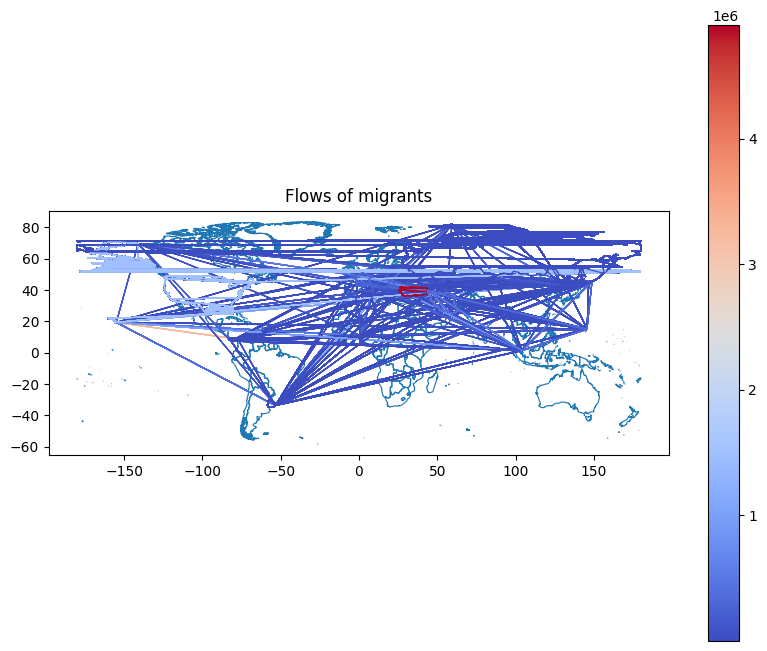

In [112]:
# Function to extract coordinates from a polygon or MultiPolygon
def extract_coordinates(geometry):
    coords = []
    if geometry.type == 'Polygon':
        return list(geometry.exterior.coords)
    elif geometry.type == 'MultiPolygon':
        for polygon in geometry.geoms:
            coords.extend(list(polygon.exterior.coords))
    return coords

def extract_geostart(region):
    geom_start = world[world['region'] == region]['geometry'].values[0]
    return extract_coordinates(geom_start)

# Your GeoDataFrame with migration data
flows = []

for index, row in df1.iterrows():
    for column, value in row.items():
        if value > 0:
            # Get geometries
            geom_start = world[world['region'] == index]['geometry'].values[0]
            geom_end = world[world['region'] == column]['geometry'].values[0]

            # Extract coordinates
            coords_start = extract_coordinates(geom_start)
            coords_end = extract_coordinates(geom_end)

            # Create geometry
            geometry = LineString(coords_start + coords_end)
            flows.append({'start': index, 'end': column, 'volume': value, 'geometry': geometry})

geo_data = gpd.GeoDataFrame(flows, crs="EPSG:4326")
geo_data = geo_data.set_geometry('geometry')

# Merging with world data
merged_data = world.merge(geo_data, left_on='region', right_on='start')

# Extract geo_start and geo_end
merged_data['geo_start'] = merged_data['start'].apply(extract_geostart)
merged_data['geo_end'] = merged_data['end'].apply(extract_geostart)

# Create a new GeoDataFrame with LineString geometries
gdf = gpd.GeoDataFrame(merged_data, geometry=[LineString(list(start) + list(end)) for start, end in zip(merged_data['geo_start'], merged_data['geo_end'])])

# Plot it
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=0.8)
gdf.plot(column='volume', cmap='coolwarm', linewidth=0.8, ax=ax, legend=True)
ax.set_title('Flows of migrants')
plt.show()


## EDA on dataset2

In [5]:
os.chdir('/Users/augustincablant/Documents/GitHub/Stat-App')
df2 = pd.read_csv('DATA/dataset2.csv')
df2_1 = pd.read_csv('DATA/dataset2_90_95.csv')
df2_2 = pd.read_csv('DATA/dataset2_95_00.csv')
df2_3 = pd.read_csv('DATA/dataset2_00_05.csv')
df2_4 = pd.read_csv('DATA/dataset2_05_10.csv')
df2.set_index('countries', inplace = True) 
df2.fillna(0, inplace=True)

In [6]:
total_migration(df2)

Destination of migrants 
 
 ABW          66852
AFG       10382540
AGO         802478
ALB         161986
ARE       10207736
           ...    
YEM        1520482
ZAF        5701078
ZMB         507548
ZWE         168294
TOTAL    314020958
Length: 197, dtype: int64 
 
 
There is 628041916 migrations in total


In [3]:
for region in list(df2.columns):
    try:
        destination_migrants(df2, region)
    except Exception as e:
        #print(f"Une erreur s'est produite pour le pays {region}: {e}")

IndentationError: expected an indented block (3741131802.py, line 5)

### Which countries are missing ?

In [52]:
df_wiki = pd.read_csv('DATA/SCRAP_countries_ISO.csv')
df_wiki.drop('Unnamed: 0', axis = 1, inplace = True)
df_wiki.rename({'Alpha-3 code':'ISO'}, inplace = True)
df_wiki.sample(5)

,Country name,Alpha-3 code
232,Ukraine,UKR
126,Liberia,LBR
113,Jersey,JEY
12,Aruba,ABW
226,Tunisia,TUN


## EDA on regions

In [31]:
df = pd.read_csv(f'DATA/from_countries_to_region/regions_00_05')
df.set_index('Unnamed: 0', inplace = True)
df[:][0:2]

,Central America,South Asia,Sub-Saharan Africa,Eastern Europe,Western Asia,South America,Oceania,Western Europe,South-East Asia,North America,Northern Europe,Central Asia,North Africa,Southern Europe
Unnamed: 0,,,,,,,,,,,,,,
Central America,204643,362,2404,3635,4291,42589,6150,74647,414,4054476,37187,3014,400,211686
South Asia,2822,1903789,43367,4888,2055796,1389,219683,142456,327597,1127535,505771,39156,4517,230783


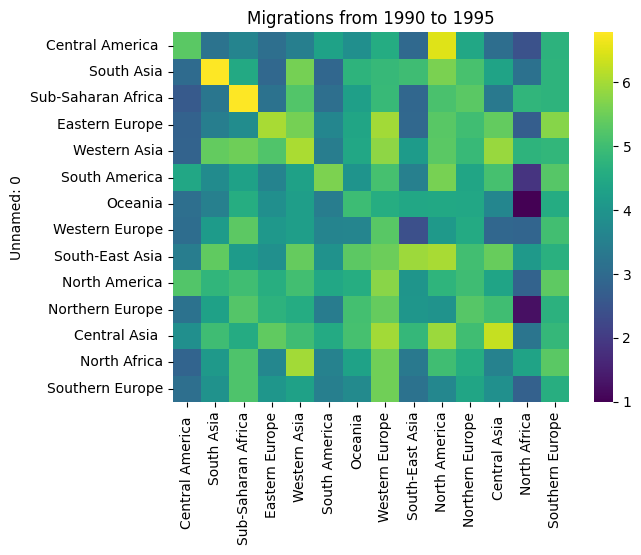

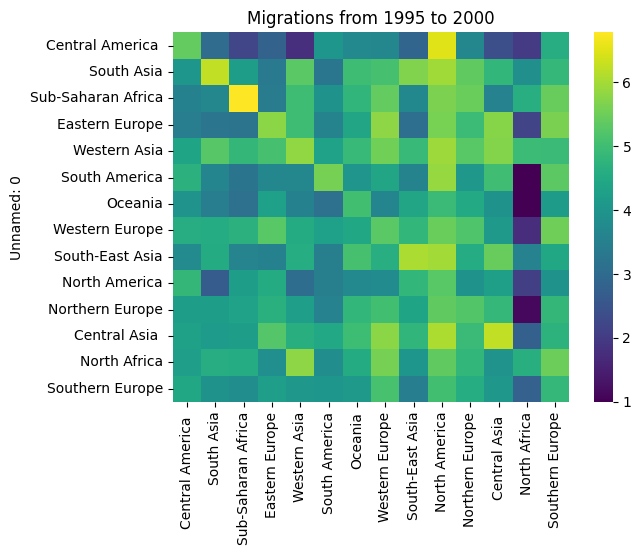

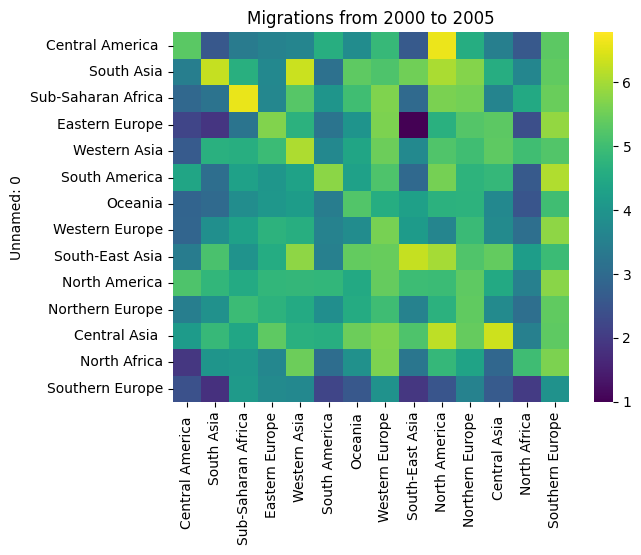

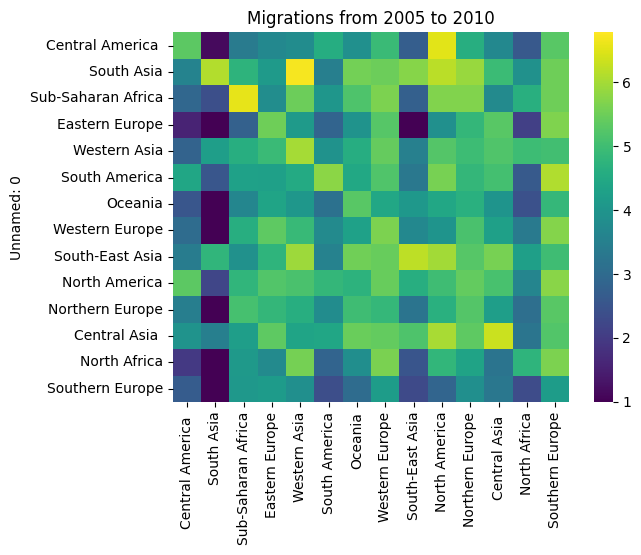

In [34]:
# We choose a logarithmic scale
liste = ['1990 to 1995', '1995 to 2000', '2000 to 2005', '2005 to 2010']
for i, dataframe in enumerate([pd.read_csv(f'DATA/from_countries_to_region/regions_'+year) for year in ['90_95', '95_00', '00_05', '05_10']]):
    dataframe.set_index('Unnamed: 0', inplace = True)
    log_data = np.log10(dataframe)
    sns.heatmap(log_data, cmap="viridis", vmin=np.log10(10), vmax=np.log10(6e6))
    plt.title(f'Migrations from {liste[i]}')
    plt.show()